# POSTTEST 7

Link Dataset : https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification?select=data

## Import Library

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
img_path = 'D:\Image Dataset\Satelite Image Dataset'

## Mengambil daftar semua file

In [3]:
os.listdir(img_path)

['cloudy', 'desert', 'green_area', 'water']

## Split dataset menjadi train,val dan test

In [4]:
from sklearn.model_selection import train_test_split
import shutil

In [5]:
# Tentukan jalur awal gambar
train_dir = 'D:\Image Dataset/train/'
val_dir = 'D:\Image Dataset/valid/'
test_dir = 'D:\Image Dataset/test/'

# Membuat direktori train, val, dan test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Memisahkan data menjadi train (70%), val (15%), dan test (15%)
all_images = os.listdir(img_path)
train_images, test_images = train_test_split(all_images, test_size=0.3, random_state=42)
val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

# Untuk Memindahkan gambar ke direktori yang sesuai
for img in train_images:
    shutil.move(os.path.join(img_path, img), os.path.join(train_dir, img))

for img in val_images:
    shutil.move(os.path.join(img_path, img), os.path.join(val_dir, img))

for img in test_images:
    shutil.move(os.path.join(img_path, img), os.path.join(test_dir, img))

## Melakukan Data Augmentation

In [6]:
# Dimensi gambar
img_width, img_height = 150, 150 

# Jumlah batch yang digunakan dalam pelatihan dan validasi
batch_size = 32

# Jumlah epoch
epochs = 10

# Inisialisasi ImageDataGenerator untuk augmentasi data
img_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalisasi nilai piksel
    validation_split = 0.1, #secara otomatis membagi dataset menjadi subset train dan validation berdasarkan persentase yang ditentukan
    rotation_range=20,  # Rotasi gambar
    width_shift_range=0.2,  # Geser gambar secara horizontal
    height_shift_range=0.2,  # Geser gambar secara vertikal
    shear_range=0.2,  # Transformasi shear
    zoom_range=0.2,  # Perbesaran gambar
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'
)

## Membuat Arsitektur Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(img_width,img_height,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])

## Compile model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Melakukan Modeling dengan train , val , test

In [9]:
train_generator = img_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    subset ='training',
    class_mode='categorical'
)

validation_generator = img_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

test_generator = img_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2700 images belonging to 2 classes.
Found 113 images belonging to 1 classes.
Found 1500 images belonging to 1 classes.


## Melatih Model dan Menyimpan Riwayat

In [10]:
history = model.fit(train_generator,
                 validation_data = validation_generator,
                 epochs=epochs
                  )

Epoch 1/10
85/85 [==============================] - 143s 2s/step - loss: 0.1248 - accuracy: 0.9641 - val_loss: 15.2128 - val_accuracy: 1.0000
Epoch 2/10
85/85 [==============================] - 137s 2s/step - loss: 0.0171 - accuracy: 0.9963 - val_loss: 14.4230 - val_accuracy: 1.0000
Epoch 3/10
85/85 [==============================] - 137s 2s/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 23.3861 - val_accuracy: 1.0000
Epoch 4/10
85/85 [==============================] - 135s 2s/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 18.8044 - val_accuracy: 1.0000
Epoch 5/10
85/85 [==============================] - 137s 2s/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 23.0718 - val_accuracy: 1.0000
Epoch 6/10
85/85 [==============================] - 136s 2s/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 13.2473 - val_accuracy: 1.0000
Epoch 7/10
85/85 [==============================] - 137s 2s/step - loss: 0.0145 - accuracy: 0.9967 - val_loss: 39.8451 - val_accuracy: 1.0000
Epoch 

## Melakukan Evaluasi Model

In [11]:
# Evaluasi model terhadap data tes
test_loss, test_accuracy = model.evaluate(test_generator)

# Cetak hasil evaluasi
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

47/47 [==============================] - 17s 360ms/step - loss: 6.9711 - accuracy: 0.2200
Test Loss: 6.971134662628174
Test Accuracy: 0.2199999988079071


## Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

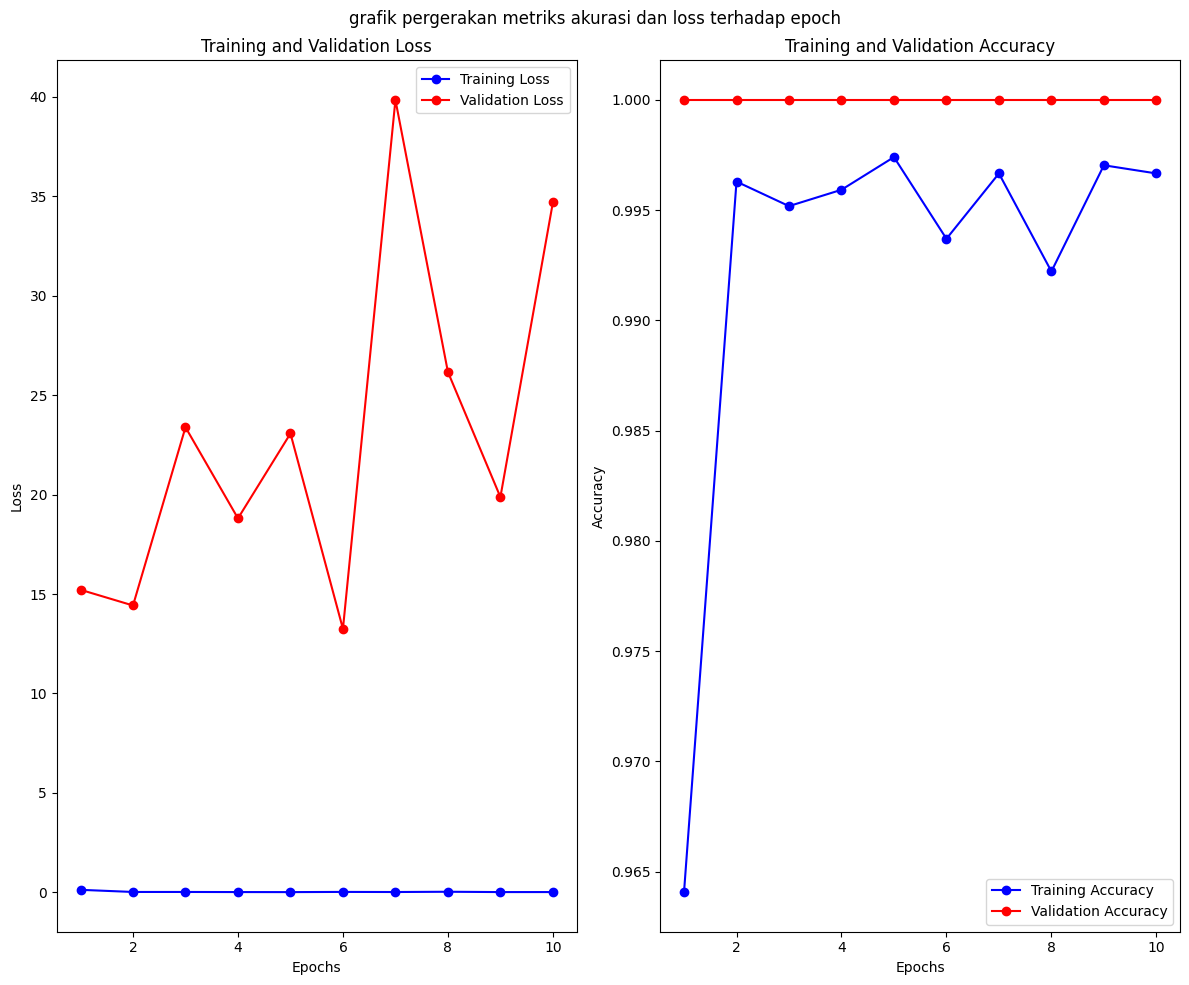

In [12]:
# Ambil data pelatihan
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Ambil data validasi
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Jumlah epoch
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 10))
plt.suptitle('grafik pergerakan metriks akurasi dan loss terhadap epoch')

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()